In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import matplotlib.patheffects as PathEffects

In [2]:
# fontsize, linewitch, etc.
fs_titles = 24
fs_labels = 24
fs_axes = 20
fs_text = 20
fs_legend = 20

#### Import compiled_SUPERsnow_flat.nc

In [3]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow_flat.nc'

# #~~~~~~ds full
# ds = xr.open_dataset(fname,  chunks={'z': 1000000})
# ds.close()

# #~~~~~~ds peak
# dpeak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]
# dpeak.close()

# ds = dpeak
# ds.close()
# ds

In [4]:
#store flat arrays
# pk_13 = ds.snow.sel(time='2013-04-03').values
# pk_14 = ds.snow.sel(time='2014-04-07').values
# pk_15 = ds.snow.sel(time='2015-03-06').values
# pk_16 = ds.snow.sel(time='2016-04-16').values
# pk_17 = ds.snow.sel(time='2017-04-01').values
# pk_18 = ds.snow.sel(time='2018-04-23').values


In [5]:
# def one_to_one(lidar_date_str_1, lidar_date_str_2):
    
#     '''array values from DataSet'''

#     s1 = ds.snow.sel(time=lidar_date_str_1).values
#     s1_gt_zero = s1 > 0
#     s2 = ds.snow.sel(time= lidar_date_str_2).values
#     s2_gt_zero = s2 > 0
    
#     print(s1.shape, s2.shape)
#     '''scatter plot'''
#     ax = plt.scatter(s2[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s2[s2_gt_zero]),
#                      s1[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s1[s1_gt_zero]), 
#                      alpha=0.01) #[:1000000][:1000000]

#     plt.grid()
#     plt.xlabel('{}'.format(lidar_date_str_2[:4]))
#     plt.ylabel('{}'.format(lidar_date_str_1[:4]))
    

# #     plt.plot([0, ??], [0, ??], '-k', linewidth = 2)
    
#     '''mean w/o zeros'''
# #     txt_mean = plt.annotate('{:.0f} vs {:.0f} cm.'.format(np.nanmean(s1[s1_gt_zero]/10), np.nanmean(s2[s2_gt_zero]/10)), xy=(?,?))

# #      '''R2 value'''      
    
    

In [6]:
# plt.figure(figsize=(20,10))
# w = one_to_one('2013-04-03', '2014-04-07')

In [7]:
# s1 = ds.snow.sel(time='2013-04-03').values
# s1_gt_zero = s1 > 0
# s2 = ds.snow.sel(time='2014-04-07').values
# s2_gt_zero = s2 > 0


# s1.close()
# s2.close()

In [8]:
# txt_mean = '{:.0f} vs {:.0f} cm.'.format(np.nanmean(s1[s1_gt_zero]/10), np.nanmean(s2[s2_gt_zero]/10))
# txt_mean

# txt_mean = plt.annotate('{:.0f} vs {:.0f} cm.'.format(np.nanmean(s1[s1_gt_zero]/10), np.nanmean(s2[s2_gt_zero]/10)), xy=(?,?))
    
                                                            

## NOT flattened to begin with

In [9]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc' #ARS
fname = '~/Documents/research/sierra/data/compiled_SUPERsnow.nc' #BSU
#~~~~ ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

#~~~~ ds peak
dpeak = ds.isel(time=[0,7,18,30,42,49]) #0,7,22,28,41,49]
dpeak.close()

ds = dpeak
ds.close()

In [10]:
# legends/labels
d_str = pd.to_datetime(ds['time'].values).strftime("%Y-%m-%d")
print('number of legend labels:', len(d_str))
print(d_str[0][:4])

number of legend labels: 6
2013


## one-to-one for ONE

In [14]:
def one_to_one(lidar_date_str_1, lidar_date_str_2):
     
    '''    
    flatten lidar
    '''
    #lidar_1
    s1 = ds.snow.sel(time=lidar_date_str_1).values.flatten()
    s1_gt_zero = s1 > 0
    
    #lidar_2
    s2 = ds.snow.sel(time=lidar_date_str_2).values.flatten()
    s2_gt_zero = s2 > 0
    
    '''
    scatter plot
    '''
    #scatter
    ax = plt.scatter(s2[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s2[s2_gt_zero]),
            s1[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s1[s1_gt_zero]), 
                     color='cornflowerblue', 
                     alpha=0.01) #[:1000000][:1000000]
    
    #blackline 1-to-1 line
    plt.plot([0, 10], [0, 10], '-k', linewidth = 2)
    
    #plot formatting
    plt.xlim(0,10); plt.ylim(0,10)
#     plt.xlabel('{}'.format(lidar_date_str_2[:4]), fontsize=fs_axes)
#     plt.ylabel('{}'.format(lidar_date_str_1[:4]), fontsize=fs_axes)
    plt.xticks(fontsize=fs_axes-6)
    plt.yticks(fontsize=fs_axes-6)
    
    '''
    text stats on plot
    '''
    # title
    txt_title = plt.annotate('{} vs {}'.
                            format(lidar_date_str_1[:4], 
                                   lidar_date_str_2[:4]), 
                            xy=(0.5,9), fontsize=fs_labels+4)
    # mean w/o zeros
    txt_mean = plt.annotate('$\mu$: {:.0f} vs. {:.0f} cm'.
                            format(np.nanmean(s1[s1_gt_zero]/10), 
                                   np.nanmean(s2[s2_gt_zero]/10)), 
                            xy=(0.5,8), fontsize=fs_labels)
    #R2 value
    r_squared = pearsonr(s2[s1_gt_zero & s2_gt_zero] / np.nanmean(s2[s2_gt_zero]),
                         s1[s1_gt_zero & s2_gt_zero] / np.nanmean(s1[s1_gt_zero]))
    txt_r_squared = plt.annotate('$R^2$: {:.3f}'.format(r_squared[0]),
                                 xy=(0.5,7), fontsize=fs_labels)
    
    return lidar_date_str_1[:4],lidar_date_str_2[:4]

runtime = 28.728519082069397


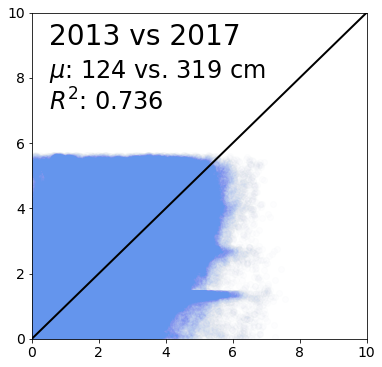

In [15]:
t=time.time()

plt.figure(figsize=(6,6))
l1,l2 = one_to_one('2013-04-03', '2017-04-01')
plt.savefig('../figs/one2one_{}_vs_{}'.format(l1,l2), dpi=300)


tt=time.time()
print('runtime =', (tt-t)/60)

## subplot version

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]


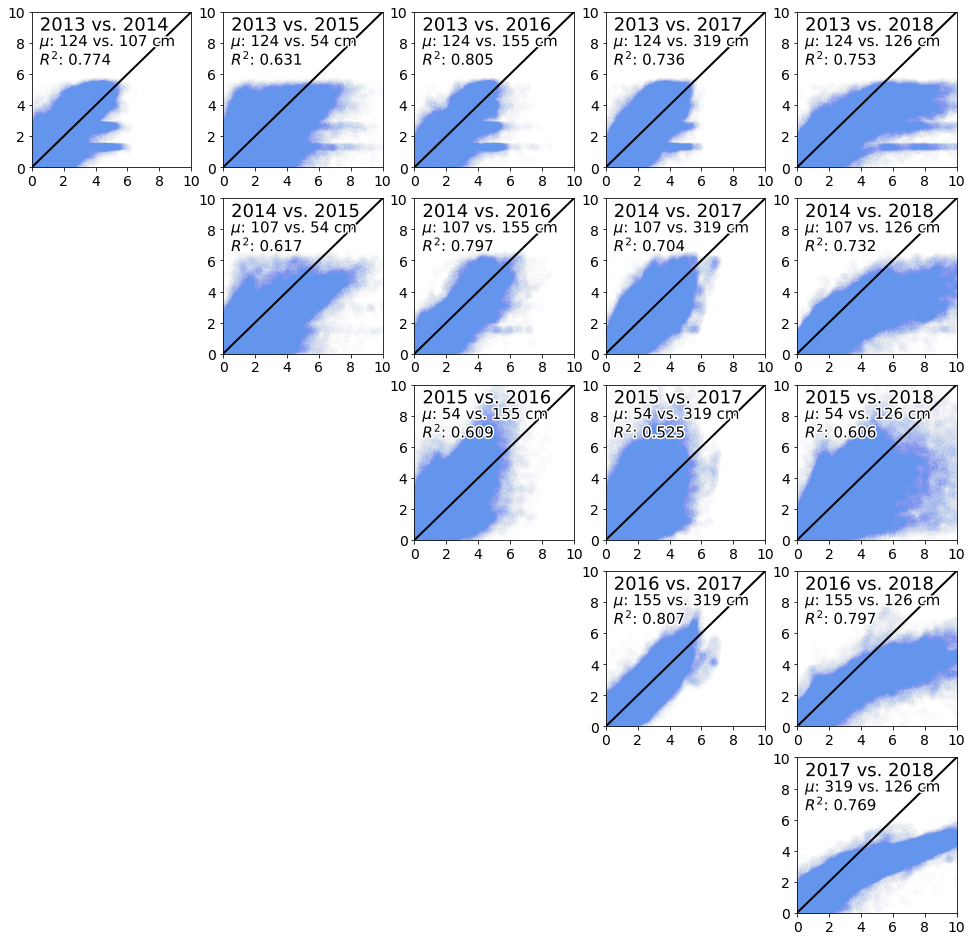

In [13]:
# Create matrix with indices
num=6 #5
num_2=5 #4
#plotting matrix:
index_matrix = np.zeros((num,num), dtype = int)
k_index = 1
for i_row in range(num):
    for i_column in range(num):
        index_matrix[i_row, i_column] = k_index
        k_index += 1
print(index_matrix)

#loop to plot
plt.figure(figsize = (20, 20))

for i_year in range(num_2):
    
    #lidar_1
    s1 = ds.snow.sel(time=d_str[i_year]).values.flatten()
    s1_gt_zero = s1 > 0

    for i_year_2 in range(i_year + 1, num):
        #lidar_2
        s2 = ds.snow.sel(time=d_str[i_year_2]).values.flatten()
        s2_gt_zero = s2 > 0

        '''
        scatter plot
        '''
        #scatter
        ax = plt.subplot(num, num, index_matrix[i_year, i_year_2])
        ax = plt.scatter(s2[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s2[s2_gt_zero]),
                s1[s1_gt_zero & s2_gt_zero][:1000000] / np.nanmean(s1[s1_gt_zero]), 
                         color='cornflowerblue', 
                         alpha=0.01) #[:1000000][:1000000]

        #blackline 1-to-1 line
        plt.plot([0, 10], [0, 10], '-k', linewidth = 2)

        #plot formatting
        plt.xlim(0,10); plt.ylim(0,10)
        plt.xticks(fontsize=fs_axes-6)
        plt.yticks(fontsize=fs_axes-6)

        '''
        text stats on plot
        '''
        # title
        txt_title = plt.annotate('{} vs. {}'.
                                format(d_str[i_year][:4], 
                                       d_str[i_year_2][:4]), 
                                xy=(0.5,8.8), fontsize=fs_labels-6)
        txt_title.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
        
        # mean w/o zeros
        txt_mean = plt.annotate('$\mu$: {:.0f} vs. {:.0f} cm'.
                                format(np.nanmean(s1[s1_gt_zero]/10), 
                                       np.nanmean(s2[s2_gt_zero]/10)), 
                                xy=(0.5,7.8), fontsize=fs_labels-9)
        txt_mean.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])

        #R2 value
        r_squared = pearsonr(s2[s1_gt_zero & s2_gt_zero] / np.nanmean(s2[s2_gt_zero]),
                             s1[s1_gt_zero & s2_gt_zero] / np.nanmean(s1[s1_gt_zero]))
        txt_r_squared = plt.annotate('$R^2$: {:.3f}'.format(r_squared[0]),
                                     xy=(0.5,6.6), fontsize=fs_labels-9)
        txt_r_squared.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
        
plt.savefig('../figs/one2one_subplots_6yrs')#, dpi=300)
#5yr: use fs_lables-2 and fs_labels-6
#6yr: use fs_lables-5 and fs_labels-9